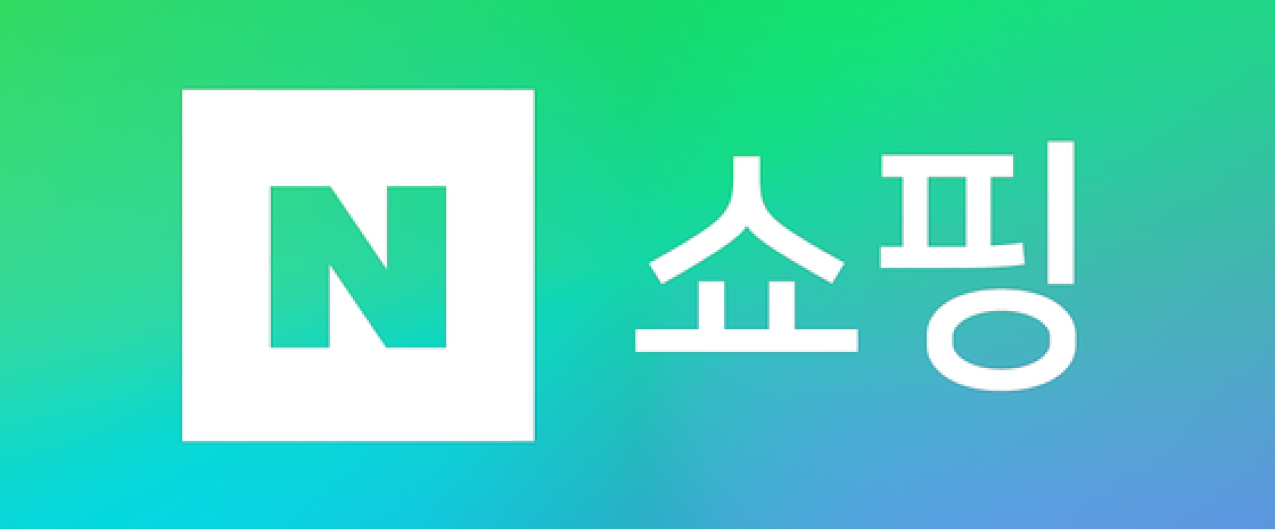
# **네이버 쇼핑몰 (동적 크롤링)**

In [1]:
# 패키지 임포트
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import selenium
from selenium import webdriver
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By # 셀레니움 4.0부터 포함된 함수(필수)
from selenium.webdriver.chrome.service import Service

In [2]:
# 크롬 웹드라이버 생성 함수
def create_driver():
    service = Service()
    options = webdriver.ChromeOptions()
    driver = webdriver.Chrome(service=service, options=options)
    return driver

### **🌐 네이버 메인 사이트**

In [102]:
# Driver 객체 생성
driver = create_driver()

In [103]:
# URL 접근
url = 'https://www.naver.com'
driver.get(url)
driver.implicitly_wait(2)

In [104]:
# 네이버는 창 크기에 따라 소스코드 달라짐
# 창 크기 고정해 놓기
driver.maximize_window()

### **🌐 쇼핑몰 사이트 Active**

In [105]:
# 쇼핑메뉴 객체를 지칭하는 css selector
sel = '#shortcutArea > ul > li:nth-child(4) > a'
# 쇼핑메뉴 클릭 
driver.find_element(By.CSS_SELECTOR, sel).click()

In [7]:
# .click()을 통해서 쇼핑페이지로 들어가면 브라우저 탭(윈도우)이 하나 더 열림 
# driver가 핸들링 할 수 있는 창이 2개가 됨
# 기본 창은 첫번째 접속했던 네이버 메인 사이트 창임
# => 드라이버의 active창을 '쇼핑페이지'로 변경 필요 

In [28]:
# 현재 핸들링 할 수 있는 창 중 1번 Index 가 쇼핑 창 
print(driver.window_handles)

['9E1369DECE9BD12E81150B7F79EFB256', '1FA766BAA7B9CC1F6271E0F2FF7C549A']


In [106]:
# 1번 Index 쇼핑 창을 active창으로 변경
driver.switch_to.window(driver.window_handles[1])

### **🔎 검색창 객체 만들기**

In [111]:
# selector
sel = '#input_text'

In [112]:
# webelement 객체 생성
search = driver.find_element(By.CSS_SELECTOR, sel)

### **🛍️ 제품 크롤링 (아이폰 13)**
- 스크롤을 최대로 진행해서 현재 페이지에서 디스플레이 되는 모든 제품을 전부 표현
- 현재 페이지에 대해서 전송된 모든 제품에 대하여 동일 소스코드로 생성하기 위함
- 스크롤과 관련된 자바스크립트 코드 사용
- window (스크립트 객체)
    - 브라우저 탭의 프레임을 포함함
    - window.scrollY : 브라우저탭의 yscroll의 현재 위치를 저장하고 있는 자바스크립트 속성

In [ ]:
######## 아이폰13 검색 ########

In [113]:
search.send_keys('아이폰13')

In [114]:
search.send_keys(Keys.ENTER)

In [ ]:
######## 스크롤 진행 ########

In [115]:
# 탭안의 스크롤바의 현재 위치를 저장 
before_h = driver.execute_script('return window.scrollY')

In [116]:
# 숨겨진 창까지 모두 내려가도록 무한스크롤 진행 (키보드의 END 키가 현재 창의 가장 끝으로 내려가도록)
while True:
    # 창의 가장 아래로 스크롤 내림, 스크롤이 창 바닦에 닿으면 새로운 창이 확장됨
    driver.find_element(By.CSS_SELECTOR,"body").send_keys(Keys.END)
    # 스크롤 사이 페이지 로딩시간 대기
    time.sleep(1)
    # 스크롤 후 높이 
    after_h = driver.execute_script('return window.scrollY')
    print(after_h)
    if after_h == before_h:
        break
    before_h = after_h

3288.5
5543.5
7793.5
10043.5
12293.5
12293.5


In [46]:
######## 상품 정보 추출 ########

In [117]:
# 상품 Selector
#__next > div > div.style_container__IrlMV > div.products_search_list__MHduf.list_extend > div
sel = 'div.products_search_list__MHduf.list_extend > div > div'
items = driver.find_elements(By.CSS_SELECTOR, sel)
print(len(items))

51


In [96]:
# items[0].get_attribute('innerHTML')

In [118]:
# 제품명 추출
#_sr_lst_40892857004 > div.adProduct_item_inner__ObdW2 > div > div.adProduct_txt_area__apmBC > div.adProduct_info_tit__yhsNL
sel = 'div.adProduct_txt_area__apmBC > div.adProduct_info_tit__yhsNL'
items[0].find_element(By.CSS_SELECTOR,sel).text

'아이폰 13 mini 자급제 128GB 미드나이트 Apple'

In [119]:
# 가격 추출
#_sr_lst_40892857004 > div.adProduct_item_inner__ObdW2 > div > div.adProduct_txt_area__apmBC > div.adProduct_price__OKPc9 > span.adProduct_num__wt79O
sel2 = 'div.adProduct_txt_area__apmBC > div.adProduct_price__OKPc9 > span'
items[0].find_element(By.CSS_SELECTOR,sel2).text

'798,000원'

In [120]:
# 제품의 실제 판매처 url
#_sr_lst_40892857004 > div.adProduct_item_inner__ObdW2 > div > a
sel3 = 'div.adProduct_item_inner__ObdW2 > div > a'
items[0].find_element(By.CSS_SELECTOR,sel3).get_attribute('href')

'https://adcr.naver.com/adcr?x=Bxd25lWZyJqPR3CthcvsCP///w==k8IbunOiGpyE9BmfFdS/ItOIPtRxt0a/IWmqJcxg7RPCRbsetYn/dww/0NCNL2hvzQn/7kLOasNLMYCTEcUf+EtPULnt8FIebt46JUDnG/B5PUxnc24BRaAeHknfYY48f/h8FT/Nm6oo0y8t5Uqnp4/t9nmhkzqvwjETcuksfBwxK8szLdpMY3t+S+/uP54VSzxX4sFC1BBqYyP+c1CSXFvXe7mUgXFg9XA+i5z4QwoyX88oAxzI79IapuFDwyrq7byc5w4FElfI8U4ZfmyHNkqdSLjl4le8zATL6hM0N3zWqPGbMLzl9lbQoQMEk3iCUO/fkM1S1UbskTNyufl5e4rgWgfHysWk4aFV9DoC634qzPqlR216m3h7/M3fnLDMVtYvNNzNLAvOvqOz3WY0ZOqpFRLTa1CJdE97dQoe3OfRsASARznTBLjYwcBr77/PTVZZT1PzFMT1wMdoDZsZ/NT52LcfcsI8UI+r4RxWhA/SVXgtlJydMovzrOF2WSO2wXVfWFEyYftK49IEYtuseWYSMxMHbdR2Um6hPX1t3f/7WstWm0MavL2uLTamPhDl+yUuRLKbDcHMx3/0Bw7fiu7VP5Ok1JFSVxNrT7pIE48JWwCKsOHYlLLA+xuPArhvhhkzm/UksNEmVoYWBGDaRAByDCFH2t30ZIfdRCZgRQqEQnZir1rBd4DK5zsB+1a5c/5QnsMwMpYPhdKcS1dpHnKrFzSRfv9VPgI47H7OMP8gWfmCB54kuv6GaqXiI7sWZvBO9o6r0VkdKZVBHic6Y3TL5E7tISZpa/dxZhzGW/aSl8tTvnDxTcl3KJdQZaWiGJodSZ9oAPktLzhFtNaY0YzUM0ehfYyGoq/pAx3jDhxz9eJRKeoWRg7dmK4Mzf0KPOLydtxHhpaJiEOVSl8FzSXxdulmaq20cKeo6l+wKa4Jt

In [100]:
# for item in items:
#     try:
#         name = item.find_element(By.CSS_SELECTOR, 'div.adProduct_txt_area__apmBC > div.adProduct_info_tit__yhsNL').text
#         price = item.find_element(By.CSS_SELECTOR, 'div.adProduct_txt_area__apmBC > div.adProduct_price__OKPc9 > span').text
#         link = item.find_element(By.CSS_SELECTOR, 'div.adProduct_item_inner__ObdW2 > div > a').get_attribute('href')
#     except:
#         name = '판매중단'
#         price = '판매중단'
#         link = '판매중단'
#     print(name,price,link)

In [123]:
# 현재 페이지의 제품정보 df 생성
name = []
info = []
link = []

# 상품정보 전체 추출
sel = 'div.products_search_list__MHduf.list_extend > div > div'
items = driver.find_elements(By.CSS_SELECTOR, sel)

for item in items:
    try:
        name.append(item.find_element(By.CSS_SELECTOR, 'div.adProduct_txt_area__apmBC > div.adProduct_info_tit__yhsNL').text)
        info.append(item.find_element(By.CSS_SELECTOR, 'div.adProduct_txt_area__apmBC > div.adProduct_price__OKPc9 > span').text)
        link.append(item.find_element(By.CSS_SELECTOR, 'div.adProduct_item_inner__ObdW2 > div > a').get_attribute('href'))
    except:
        name.append('판매중단')
        info.append('판매중단')
        link.append('판매중단')

In [124]:
len(name), len(info), len(link)

(51, 51, 51)

In [125]:
df_fin = pd.DataFrame({'품명':name, '가격':info, 'link':link})

In [126]:
df_fin

,품명,가격,link
0,아이폰 13 mini 자급제 128GB 미드나이트 Apple,"798,000원",https://adcr.naver.com/adcr?x=Bxd25lWZyJqPR3Ct...
1,Apple 아이폰 13 mini 자급제 128GB 그린 MNFF3KH/A,"689,000원",https://adcr.naver.com/adcr?x=hLMHsX4nMwyBxLEf...
2,[한달체험가능] Apple 정품 아이폰 13 512GB [자급제],"1,200,000원",https://adcr.naver.com/adcr?x=+qlH1zjCKBF6H2jV...
3,판매중단,판매중단,판매중단
4,판매중단,판매중단,판매중단
5,판매중단,판매중단,판매중단
6,판매중단,판매중단,판매중단
7,판매중단,판매중단,판매중단
8,판매중단,판매중단,판매중단
9,판매중단,판매중단,판매중단


In [127]:
df_fin.to_csv('./crawl_data/네이버쇼핑_아이폰13.csv')

In [128]:
driver.close()

In [129]:
driver.switch_to.window(driver.window_handles[0])
driver.close()